In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
HP = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/house_price.csv')

HP.shape

(6028, 7)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


In [6]:
HP.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [7]:
HP1 = HP[['area', 'bedrooms', 'bathrooms', 'price']]
HP1.head(3)

,area,bedrooms,bathrooms,price
0,1188,3,2,598291
1,3512,5,3,1744259
2,1134,3,2,571669


In [8]:
import matplotlib.pyplot as plt

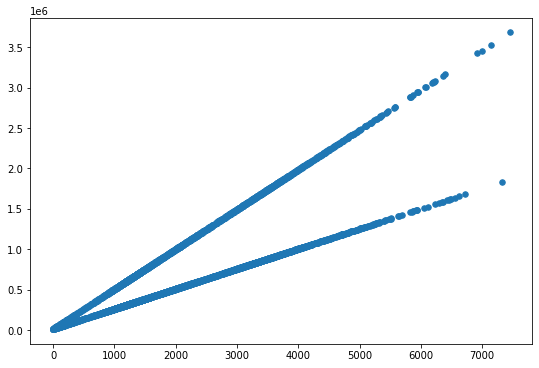

In [9]:
plt.figure(figsize = (9, 6))
plt.scatter(x = HP1.area , y = HP1.price, s = 30)
plt.show()

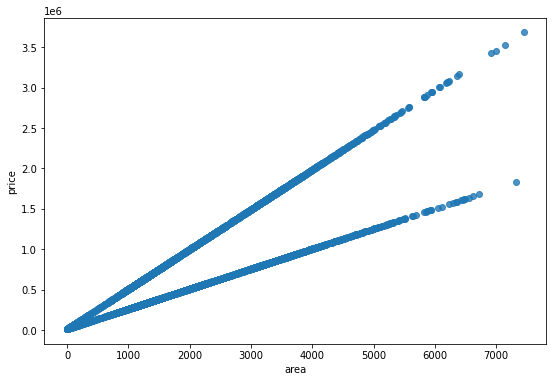

In [10]:
fig = plt.figure(figsize = (9,6))
sns.regplot(x = 'area' , y = 'price', data = HP1, fit_reg = False)
plt.show()

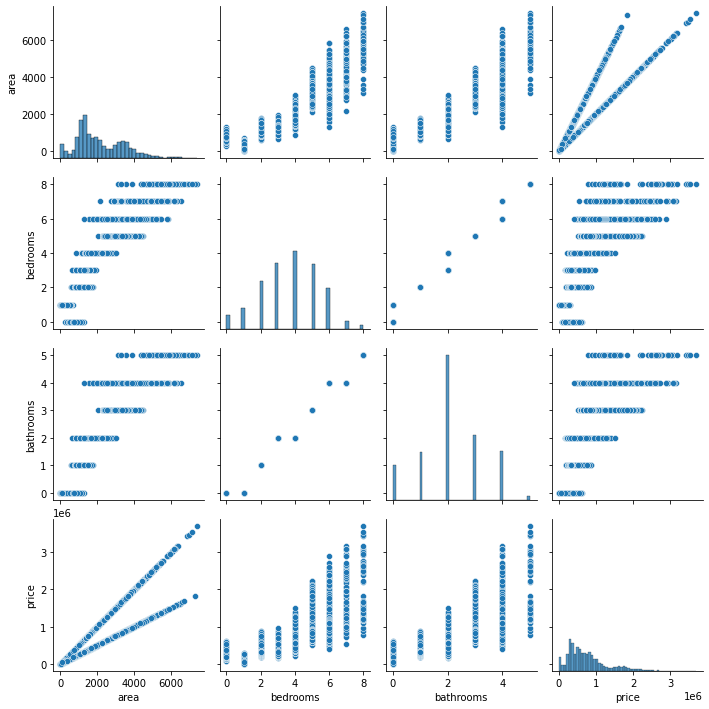

In [11]:
sns.pairplot(HP1)
plt.show()

In [12]:
from scipy import stats
stats.pearsonr(HP1.price, HP1.area)[0]

0.8234537182735618

In [13]:
from scipy import stats
stats.pearsonr(HP1.price, HP1.bathrooms)[0]

0.7358511123795443

In [14]:
from scipy import stats
stats.pearsonr(HP1.price, HP1.bedrooms)[0]

0.7434351418523943

# Train & Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = HP1[['area']]
y = HP1['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

In [18]:
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (4219, 1) (4219,)
Test Data :  (1809, 1) (1809,)


In [19]:
from sklearn.linear_model import LinearRegression
RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('weight(w) : ', RA.coef_)
print('bias(b) : ', '%.8f' % RA.intercept_)

weight(w) :  [349.29377687]
bias(b) :  7885.39294194


In [21]:
RA.score(X_test, y_test)

0.6784229855524156

# 모델 평가

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
y_hat = RA.predict(X_test)

In [43]:
mean_squared_error(y_test,y_hat)
# price의 값이 높기 때문에 이 값도 높게 나온다

88607832178.18301

# Visualization

In [25]:
y_hat1 = RA.predict(X)

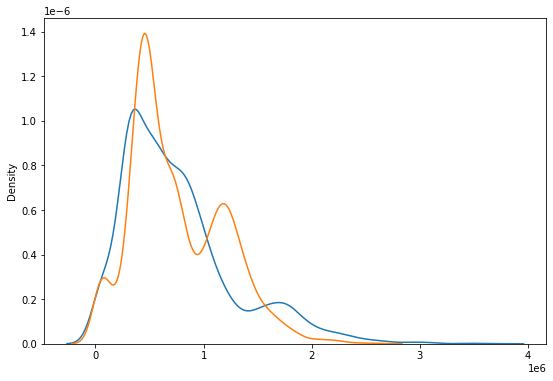

In [42]:
plt.figure(figsize = (9,6))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat1, hist = False, label = 'y_hat', ax = ax1)
plt.show()
# ylim을 지워 그래프를 잘 보이게 함

# Multivariate Regression

In [27]:
HP2 = HP[['area', 'bedrooms', 'bathrooms', 'price']]
HP2.head(3)

,area,bedrooms,bathrooms,price
0,1188,3,2,598291
1,3512,5,3,1744259
2,1134,3,2,571669


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = HP2[['area', 'bedrooms', 'bathrooms']]
y = HP2[['price']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

In [31]:
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (4219, 3) (4219, 1)
Test Data :  (1809, 3) (1809, 1)


In [32]:
from sklearn.linear_model import LinearRegression
MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [[  346.0785613  -9785.3036604  18207.31285599]]
bias(b) :  11743.96746589


In [34]:
MR.score(X_test, y_test)

0.6781719844487373

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(y_test, MR.predict(X_test))

88676993413.81882

In [37]:
y_hat3 = MR.predict(X_test)

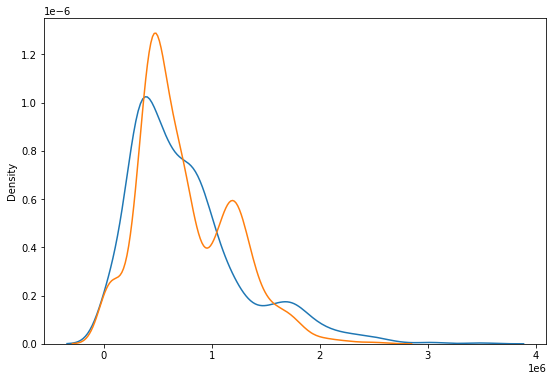

In [41]:
plt.figure(figsize = (9,6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(y_hat3, hist = False, label = 'y_hat', ax = ax1)
plt.show()